In [0]:
import pandas as pd
from pandas import plotting
from pandas.plotting import scatter_matrix
import numpy as np
import re
import datetime
import ast
import seaborn as sns
import string
import csv
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [0]:
df = pd.read_csv('final_metadata.csv')
df.shape

(45346, 50)

In [0]:
for i in range(df['genres'].size):
  a = df["genres"][i]
  b = re.compile("\[|\]|'")
  j = b.sub("",a)
  df["genres"][i] = j.split(", ")


In [0]:
for i in range(df['keywords'].size):
  a = df["keywords"][i]
  b = re.compile("\[|\]|'")
  j = b.sub("",a)
  df["keywords"][i] = j.split(", ")

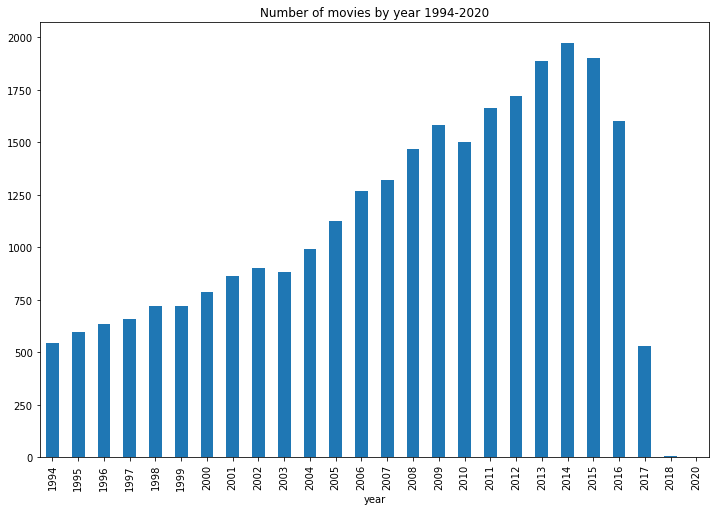

In [0]:

df[df.year >= 1994].groupby('year').size().plot(kind = 'bar', figsize = (12,8), title = 'Number of movies by year 1994-2020')





In [0]:
br = df.groupby('year')['budget', 'revenue'].sum()

Text(17.200000000000017, 0.5, 'Dollar')

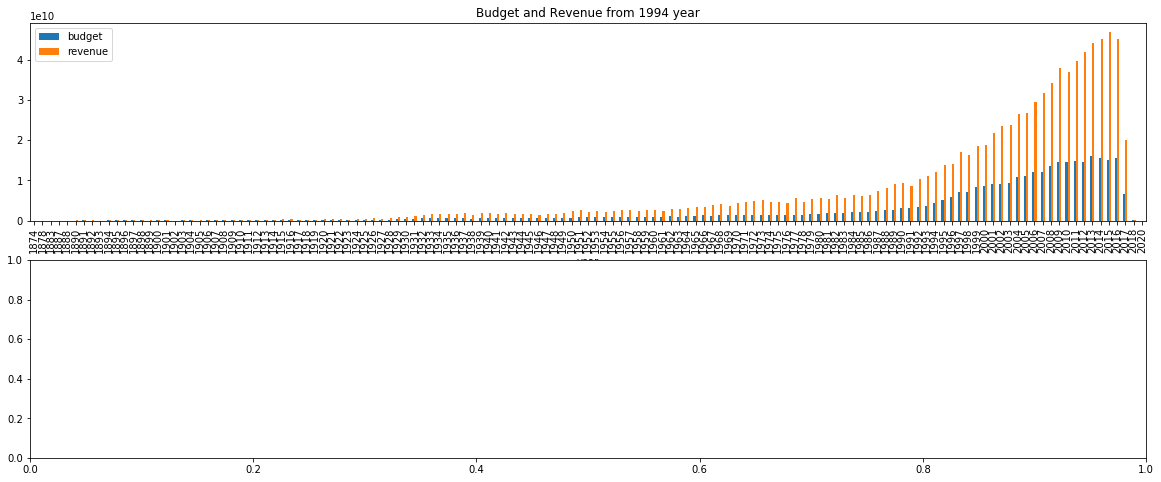

In [0]:
fig, ax = plt.subplots(2, 1, figsize=(20, 8))
# axes.tick_params(labelsize=8)
br.iloc[:, 0:2].plot(kind='bar', ax=ax[0], title='Budget and Revenue from 1994 year')
axes[0].set_ylabel('Dollar')

Text(0, 0.5, 'Dollar')

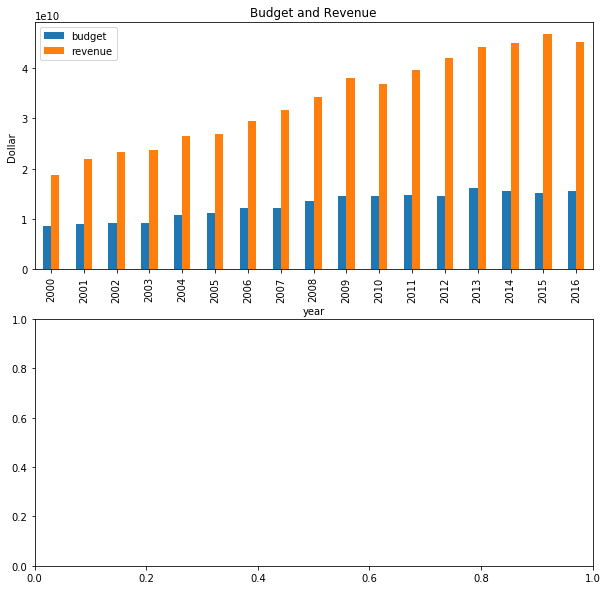

In [0]:
b_r = movies_16.groupby('year')['budget', 'revenue'].sum()
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
b_r.iloc[:, 0:2].plot(kind='bar', ax=axes[0], title='Budget and Revenue')
axes[0].set_ylabel('Dollar')
# fig.tight_layout()

<p>
<span style="color:red">
    Comment:
    We set a bar at 'year' = 1993, from graph, we can see that a large number of movies released is above 750, but in year 2017 and after the number of movies is below 500, which might implies the dataset is not update to date, so our analysis has to be limited within year 2000 and 2016.
</span>
</p>

In [0]:

movies_16 = df[(df.year >= 2000) & (df.year < 2017)].reset_index(drop = True)


In [0]:
movies_16.shape

(23451, 50)

In [0]:
movies_16.columns

Index(['id', 'title', 'runtime', 'budget', 'revenue', 'popularity', 'year',
       'lead', 'director', 'production_companies', 'production_countries',
       'overview', 'genres', 'Action', 'Adventure', 'Animation', 'Aniplex',
       'BROSTA TV', 'Carousel Productions', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'GoHands', 'History', 'Horror',
       'Mardock Scramble Production Committee', 'Music', 'Mystery',
       'Odyssey Media', 'Pulser Productions', 'Rogue State', 'Romance',
       'Science Fiction', 'Sentai Filmworks', 'TV Movie',
       'Telescene Film Group Productions', 'The Cartel', 'Thriller',
       'Vision View Entertainment', 'War', 'Western', 'tagline', 'keywords',
       'vote_average', 'vote_count', 'score'],
      dtype='object')

In [0]:
genre_list = []
for i in range(len(movies_16)):
    num = len(movies_16['genres'][i])
    for j in range(num):
        if movies_16['genres'][i][j] not in genre_list:
            genre_list.append(movies_16['genres'][i][j])

In [0]:
genre_list

['Animation',
 'Family',
 'Drama',
 'Crime',
 'Music',
 'Horror',
 'Thriller',
 'Mystery',
 'Romance',
 'Adventure',
 'Fantasy',
 'Action',
 'War',
 'Comedy',
 'Science Fiction',
 'History',
 'Documentary',
 'TV Movie',
 '',
 'Western',
 'Foreign']

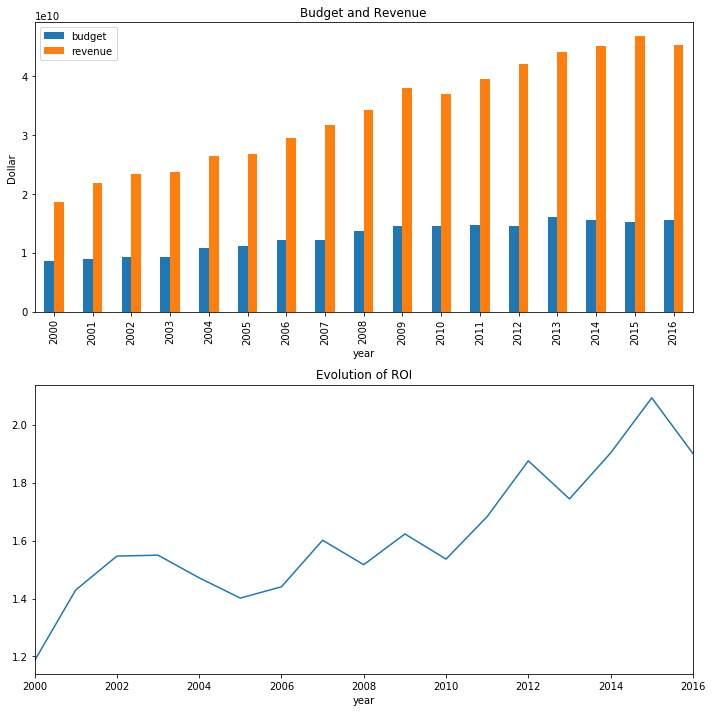

In [0]:
b_r = movies_16.groupby('year')['budget', 'revenue'].sum()
b_r['ROI'] = (b_r.revenue - b_r.budget) / b_r.budget
#作图：
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
b_r.iloc[:, 0:2].plot(kind='bar', ax=axes[0], title='Budget and Revenue')
axes[0].set_ylabel('Dollar')
b_r.ROI.plot(ax=axes[1], title='Evolution of ROI')
fig.tight_layout()

<p>
<span style="color:red">
    Between 2000 and 2016, the budget on movie production doesn't have significant growth, but revenue is significantly growing as same as ROI. 
</span>
</p>

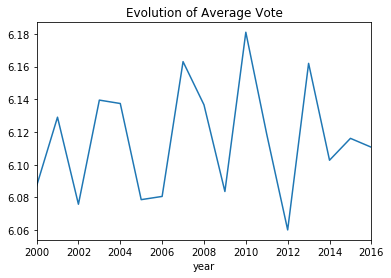

In [0]:

wr_by_year = movies_16.groupby('year').vote_average.mean()
wr_by_year.plot(title = 'Evolution of Average Vote')

<p>
<span style="color:red">
    Overall, the average vote fluctuates around 6.10 every year. Not significant.  
</span>
</p>

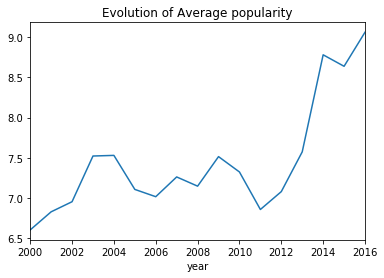

In [0]:
popularity_by_year = movies_16.groupby('year').popularity.mean()
popularity_by_year.plot(title = 'Evolution of Average popularity')

<p>
<span style="color:red">
    Overall, average popularity is significantly growing every year. 
</span>
</p>

In [0]:
movies_16.columns

Index(['id', 'title', 'runtime', 'budget', 'revenue', 'popularity', 'year',
       'lead', 'director', 'production_companies', 'production_countries',
       'overview', 'genres', 'Action', 'Adventure', 'Animation', 'Aniplex',
       'BROSTA TV', 'Carousel Productions', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'GoHands', 'History', 'Horror',
       'Mardock Scramble Production Committee', 'Music', 'Mystery',
       'Odyssey Media', 'Pulser Productions', 'Rogue State', 'Romance',
       'Science Fiction', 'Sentai Filmworks', 'TV Movie',
       'Telescene Film Group Productions', 'The Cartel', 'Thriller',
       'Vision View Entertainment', 'War', 'Western', 'tagline', 'keywords',
       'vote_average', 'wr'],
      dtype='object')

[Text(0, 0.5, 'runtime'),
 Text(0, 1.5, 'budget'),
 Text(0, 2.5, 'revenue'),
 Text(0, 3.5, 'popularity'),
 Text(0, 4.5, 'year'),
 Text(0, 5.5, 'vote_average'),
 Text(0, 6.5, 'vote_count'),
 Text(0, 7.5, 'score')]

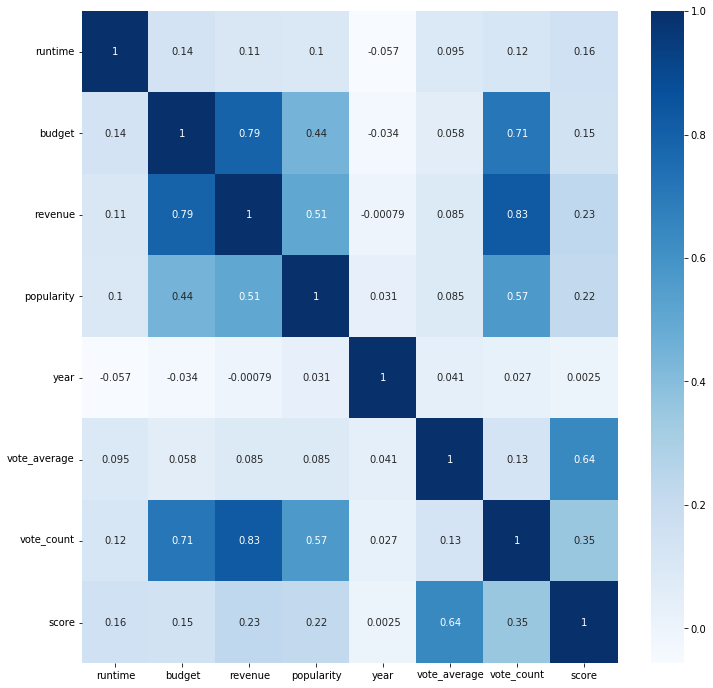

In [0]:
plt.figure(figsize=(12, 12))
g = sns.heatmap(movies_16.drop(['title', 'id', 'lead', 'director', 'production_companies', 
                'production_countries', 'overview', 'genres', 'tagline', 'keywords', 
            'Action', 'Adventure', 'Animation', 'Aniplex', 'BROSTA TV',
       'Carousel Productions', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'GoHands', 'History', 'Horror',
       'Mardock Scramble Production Committee', 'Music', 'Mystery',
       'Odyssey Media', 'Pulser Productions', 'Rogue State', 'Romance',
       'Science Fiction', 'Sentai Filmworks', 'TV Movie',
       'Telescene Film Group Productions', 'The Cartel', 'Thriller',
       'Vision View Entertainment', 'War', 'Western'], axis = 1).corr(), annot=True, cmap="Blues")
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
g.set_xticklabels(g.get_xticklabels(), rotation=0, horizontalalignment='right', ha='center')
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right', va='center')

- Revenue has large correlation with budget, vote_count, and popularity.

- We don't see large correlation between score and other feature. Score has semblable correlation with runtime, budget, revenue, and popularity, and vote_count.

In [0]:
movies_16

,id,title,runtime,budget,revenue,popularity,year,lead,director,production_companies,...,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western,tagline,keywords,vote_average,wr
0,12.0,Finding Nemo,100.000000,9.400000e+07,9.403355e+08,25.50,2003,Albert Brooks,Andrew Stanton,['Pixar Animation Studios'],...,0.0,0.0,0.0,0.0,0.0,0.0,There are 3.7 trillion fish in the ocean. They...,"['father son relationship', 'harbor', 'underwa...",7.60,7.59
1,16.0,Dancer in the Dark,140.000000,1.280000e+07,4.003188e+07,10.68,2000,Björk,Lars von Trier,"['Fine Line Features', 'Zentropa Entertainment...",...,0.0,0.0,0.0,0.0,0.0,0.0,You don't need eyes to see.,"['individual', 'dancing', 'usa', 'robbery', 'f...",7.70,7.48
2,17.0,The Dark,87.000000,4.171151e+06,1.123655e+07,5.69,2006,Sean Bean,John Fawcett,"['Constantin Film', 'Impact Pictures', 'Isle o...",...,0.0,0.0,1.0,0.0,0.0,0.0,One of the living for one of the dead.,"['suicide', 'paradise', 'child abuse', 'sea', ...",5.60,5.77
3,20.0,My Life Without Me,106.000000,4.171151e+06,9.726954e+06,10.31,2003,Sarah Polley,Isabel Coixet,"['El Deseo', 'Milestone Productions']",...,0.0,0.0,0.0,0.0,0.0,0.0,0,"['farewell', 'responsability', 'dying and deat...",7.20,6.69
4,22.0,Pirates of the Caribbean: The Curse of the Bla...,143.000000,1.400000e+08,6.550112e+08,47.33,2003,Johnny Depp,Gore Verbinski,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",...,0.0,0.0,0.0,0.0,0.0,0.0,Prepare to be blown out of the water.,"['exotic island', 'blacksmith', 'east india tr...",7.50,7.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6651,458808.0,Nice Places to Die,93.638091,4.171151e+06,1.123655e+07,0.09,2015,0,Bernd Schaarmann,[],...,0.0,0.0,0.0,0.0,0.0,0.0,0,[],5.62,5.75
6652,459928.0,12 Feet Deep,85.000000,4.171151e+06,1.123655e+07,4.48,2016,0,Matt Eskandari,['Citizen Skull Productions'],...,0.0,0.0,1.0,0.0,0.0,0.0,"100,000 gallons of water. 50 meters wide. No. ...","['sister sister relationship', 'strong woman',...",5.10,5.53
6653,460870.0,Shock and Awe: The Story of Electricity,180.000000,4.171151e+06,1.123655e+07,0.01,2011,0,Alex Freeman,"['BBC', 'The Open University']",...,0.0,0.0,0.0,0.0,0.0,0.0,0,"['electricity', 'scientific experiment', 'niko...",5.62,5.75
6654,461088.0,50 Kilos of Sour Cherry,89.000000,4.171151e+06,1.123655e+07,0.03,2016,هستی مهدوی‌فر,Mani Haghighi,[],...,0.0,0.0,0.0,0.0,0.0,0.0,0,[],5.62,5.75


In [0]:
def countN(column):
    count = dict()
    for row in column:
        for ele in row:
            if ele in count:
                count[ele] += 1
            else:
                count[ele] = 1
    return count

In [0]:
movies_16.genres

0                 [Animation, Family]
1               [Drama, Crime, Music]
2         [Horror, Thriller, Mystery]
3                    [Drama, Romance]
4        [Adventure, Fantasy, Action]
                     ...             
23446                   [Documentary]
23447                      [Thriller]
23448                   [Documentary]
23449         [Family, Drama, Comedy]
23450                   [Documentary]
Name: genres, Length: 23451, dtype: object

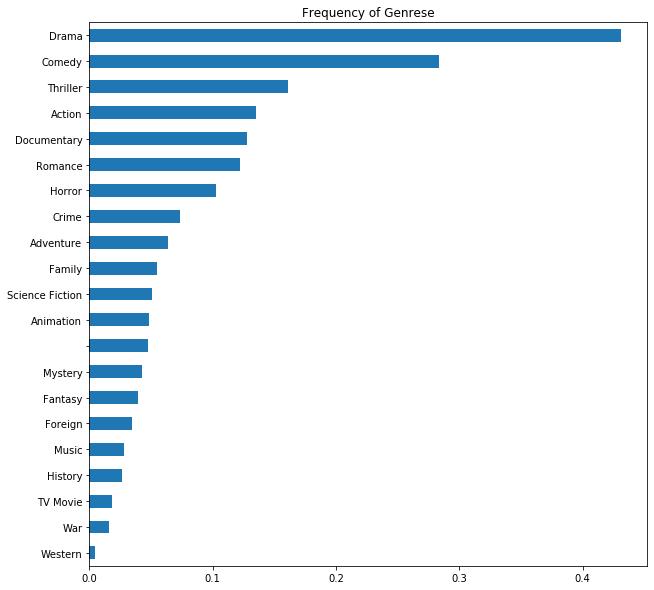

In [0]:
## It has bug because each genre is quoted, we need to get rid of the genre when we read csv
## need to edit!!!
genres = pd.Series(countN(movies_16.genres)).sort_values()
genres_avg = genres / len(movies_16)
genres_avg.plot(figsize = (10, 10), kind = 'barh', title = 'Frequency of Genres')


In [0]:
## Revenue by different genres
movies_by_genres = pd.DataFrame(0, index = genres.index, columns = ['revenue', 'budget', 'score'])
for i in range(len(movies_16)):
    for g in movies_16.genres[i]:
        movies_by_genres.loc[g, 'revenue'] += movies_16.revenue[i]    #该类影片的总票房
        movies_by_genres.loc[g, 'budget'] += movies_16.budget[i]    #该类型影片的总均预算
        movies_by_genres.loc[g, 'score'] += movies_16.score[i]    #该类型影片的总评分
movies_by_genres = movies_by_genres.div(genres.values, axis=0)
movies_by_genres['ROI'] = (movies_by_genres.revenue - movies_by_genres.budget) / movies_by_genres.budget

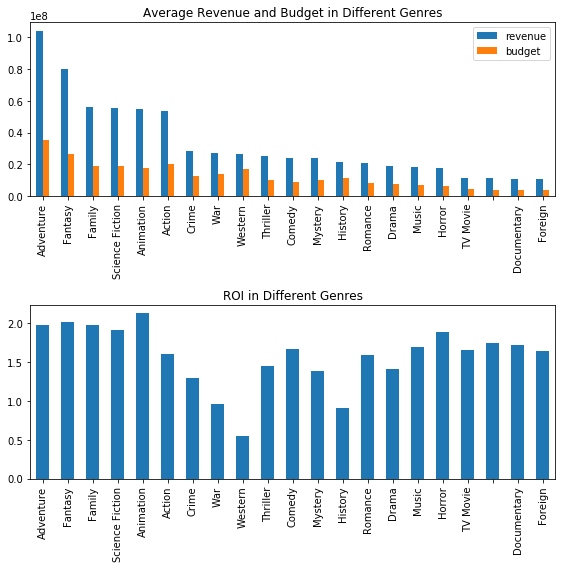

In [0]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
movies_by_genres.sort_values('revenue', ascending=False)[['revenue', 'budget']].plot(ax=axes[0], kind = 'bar', title='Average Revenue and Budget in Different Genres')
movies_by_genres.sort_values('revenue', ascending=False)['ROI'].plot(ax=axes[1], kind = 'bar', title='ROI in Different Genres')
fig.tight_layout()


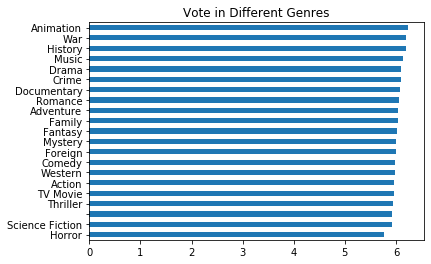

In [0]:

movies_by_genres.sort_values('score').score.plot(kind = 'barh', title='Vote in Different Genres')

In [0]:
revenue_of_director = movies_16.groupby('director').revenue.mean()    #平均票房

In [0]:
revenue_of_director

director
 Dale Trevillion\t     1.125731e+07
 Davide Manuli         1.125731e+07
 Vitaliy Vorobyov      1.125731e+07
 Yeon Sang-Ho          8.975425e+06
0                      1.113572e+07
                           ...     
Федор Дмитриев         1.125731e+07
پیمان معادی            1.125731e+07
塩谷 直義                  1.125731e+07
杰森·莫玛                  1.125731e+07
진모영                    1.125731e+07
Name: revenue, Length: 12927, dtype: float64

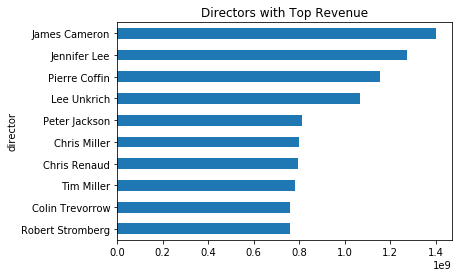

In [0]:
revenue_of_director.sort_values().tail(10).plot(kind = 'barh', title = 'Directors with Top Revenue')

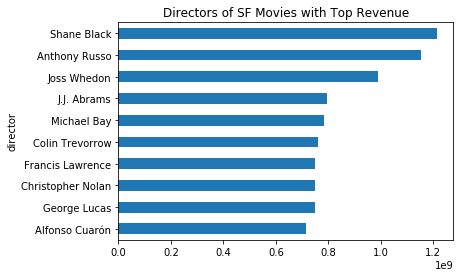

In [0]:

revenue_director_genres = movies_16[movies_16.genres.str.contains('Science Fiction', regex=False)].groupby('director').revenue.mean()
revenue_director_genres.sort_values().tail(10).plot(kind = 'barh', title = 'Directors of SF Movies with Top Revenue')


In [0]:
vote_of_director = movies_16.groupby('director').score.mean() 

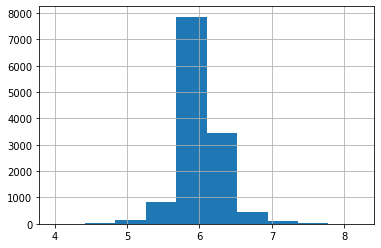

In [0]:
vote_of_director.hist()

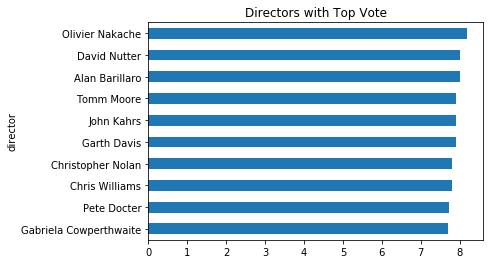

In [0]:
vote_of_director.sort_values().tail(10).plot(kind = 'barh', title = 'Directors with Top Vote')

### Model and Evaluation

In [0]:
import random
import sklearn 
from sklearn import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
l = movies_16['score'].describe()['25%']
m = movies_16['score'].describe()['50%']
u = movies_16['score'].describe()['75%']
movies_16['score'].describe()

count    23451.000000
mean         6.020025
std          0.395469
min          3.200000
25%          5.800000
50%          6.000000
75%          6.100000
max          8.400000
Name: score, dtype: float64

In [0]:
m

6.0

In [0]:
movies_16['score'].describe()

count    23451.000000
mean         6.020025
std          0.395469
min          3.200000
25%          5.800000
50%          6.000000
75%          6.100000
max          8.400000
Name: score, dtype: float64

### Classify the Target Variable into 1 and 0

In [0]:
# split wr in 2 levels
movies_16.loc[movies_16['score'] <= 6.0, 'Y'] = 0
movies_16.loc[movies_16['score'] > 6.0, 'Y'] = 1
movies_16

,id,title,runtime,budget,revenue,popularity,year,lead,director,production_companies,...,Thriller,Vision View Entertainment,War,Western,tagline,keywords,vote_average,vote_count,score,Y
0,12,Finding Nemo,100.0,94000000.0,9.403355e+08,25.5,2003,Albert Brooks,Andrew Stanton,['Pixar Animation Studios'],...,0.0,0.0,0.0,0.0,There are 3.7 trillion fish in the ocean. They...,"['father son relationship', 'harbor', 'underwa...",7.6,6292.0,7.6,1.0
1,16,Dancer in the Dark,140.0,12800000.0,4.003188e+07,10.7,2000,Björk,Lars von Trier,"['Fine Line Features', 'Zentropa Entertainment...",...,0.0,0.0,0.0,0.0,You don't need eyes to see.,"['individual', 'dancing', 'usa', 'robbery', 'f...",7.7,392.0,7.5,1.0
2,17,The Dark,87.0,4178790.0,1.125731e+07,5.7,2006,Sean Bean,John Fawcett,"['Constantin Film', 'Impact Pictures', 'Isle o...",...,1.0,0.0,0.0,0.0,One of the living for one of the dead.,"['suicide', 'paradise', 'child abuse', 'sea', ...",5.6,76.0,5.8,0.0
3,20,My Life Without Me,106.0,4178790.0,9.726954e+06,10.3,2003,Sarah Polley,Isabel Coixet,"['El Deseo', 'Milestone Productions']",...,0.0,0.0,0.0,0.0,0,"['farewell', 'responsability', 'dying and deat...",7.2,78.0,6.7,1.0
4,22,Pirates of the Caribbean: The Curse of the Bla...,143.0,140000000.0,6.550112e+08,47.3,2003,Johnny Depp,Gore Verbinski,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",...,0.0,0.0,0.0,0.0,Prepare to be blown out of the water.,"['exotic island', 'blacksmith', 'east india tr...",7.5,7191.0,7.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23446,458808,Nice Places to Die,94.0,4178790.0,1.125731e+07,0.1,2015,0,Bernd Schaarmann,[],...,0.0,0.0,0.0,0.0,0,[],5.6,109.0,5.7,0.0
23447,459928,12 Feet Deep,85.0,4178790.0,1.125731e+07,4.5,2016,0,Matt Eskandari,['Citizen Skull Productions'],...,1.0,0.0,0.0,0.0,"100,000 gallons of water. 50 meters wide. No. ...","['sister sister relationship', 'strong woman',...",5.1,62.0,5.5,0.0
23448,460870,Shock and Awe: The Story of Electricity,180.0,4178790.0,1.125731e+07,0.0,2011,0,John Eastman,"['BBC', 'The Open University']",...,0.0,0.0,0.0,0.0,0,"['electricity', 'scientific experiment', 'niko...",5.6,109.0,5.7,0.0
23449,461088,50 Kilos of Sour Cherry,89.0,4178790.0,1.125731e+07,0.0,2016,هستی مهدوی‌فر,Mani Haghighi,[],...,0.0,0.0,0.0,0.0,0,[],5.6,109.0,5.7,0.0
